## Spatial Data Science (GIS6307/GEO4930)

---

# Week 4: Vector and Raster Model


<br>
Instructor: Yi Qiang (qiangy@usf.edu)<br>

---

## 1. Install GeoPandas and Rasterio
Please follow [this instruction](https://github.com/qiang-yi/spatial_data_science/blob/main/other/new_env.ipynb) to set up an new environment and install GeoPandas and Rasterio. After the installation, please close this notebook and launch Jupyter Notebook from the "geo" environment to work on this lab.

In [1]:
import geopandas as gpd
import rasterio as rio

## 2. Vector Data

### 2.1 Importing a shapefile to geodataframe

Create a folder 'other' in the folder of your jupyter notebook. Then, download the zip file from this [link](https://usf.box.com/s/od9g9cnot83ymqw0y375i4xestqv4lsi). 

The zip file contains a shapefile 'conus.shp', which consists of multiple files with the same file name but different suffixes. These files store different information of the vector data.

First, print files in the "other" folder. All files with a name "conus" are components of the shapefile.

In [2]:
import glob
glob.glob("other/*")

['other\\airbnb.csv',
 'other\\berlin-listings.csv',
 'other\\berlin.geojson',
 'other\\berlin_airbnb.geojson',
 'other\\CensusTract_Oahu.cpg',
 'other\\CensusTract_Oahu.dbf',
 'other\\CensusTract_Oahu.prj',
 'other\\CensusTract_Oahu.sbn',
 'other\\CensusTract_Oahu.sbx',
 'other\\CensusTract_Oahu.shp',
 'other\\CensusTract_Oahu.shp.xml',
 'other\\CensusTract_Oahu.shx',
 'other\\chicago_stores.csv',
 'other\\conus.cpg',
 'other\\conus.dbf',
 'other\\conus.prj',
 'other\\conus.shp',
 'other\\conus.shx',
 'other\\county_pop.xlsx',
 'other\\crime.CPG',
 'other\\crime.csv',
 'other\\crime.dbf',
 'other\\crime.prj',
 'other\\crime.sbn',
 'other\\crime.sbx',
 'other\\crime.shp',
 'other\\crime.shp.xml',
 'other\\crime.shx',
 'other\\dem.tfw',
 'other\\dem.tif',
 'other\\dem.tif.aux.xml',
 'other\\dem.tif.ovr',
 'other\\desktop.ini',
 'other\\flickr.csv',
 'other\\hill_dem.tfw',
 'other\\hill_dem.tif',
 'other\\hi_oahu_2011_ccap_hr_land_cover20140619.img',
 'other\\hi_oahu_2011_ccap_hr_land_co

Read the shapefile into a geodataframe, and preview the geodataframe.

In [3]:
us = gpd.read_file("other/conus.shp") 

us.head()

,GEOID,NAME,ALAND,AWATER,Abbr,Capital,Population,geometry
0,01,Alabama,131173688951,4593686489,AL,Montgomery,4903185,"MULTIPOLYGON (((-88.05338 30.50699, -88.05109 ..."
1,04,Arizona,294198560125,1027346486,AZ,Phoenix,7278717,"POLYGON ((-114.81629 32.50804, -114.81432 32.5..."
2,05,Arkansas,134771517596,2960191698,AR,Little Rock,3017804,"POLYGON ((-94.61783 36.49941, -94.61765 36.499..."
3,06,California,403501101370,20466718403,CA,Sacramento,39512223,"MULTIPOLYGON (((-118.60442 33.47855, -118.5987..."
4,08,Colorado,268429343790,1175112870,CO,Denver,5758736,"POLYGON ((-109.06025 38.59933, -109.05954 38.7..."


You may notice that the geodataframe is actually a Pandas DataFrame + a column of geometry . The geometry contains coordinates (latitude and longitude) of polygons/multipolygons.

Plot the shapefile in a map

<AxesSubplot:>

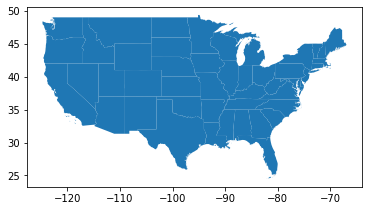

In [4]:
us.plot()

If you feel the figure is too small, you can change the default plot size to make the map larger

<AxesSubplot:>

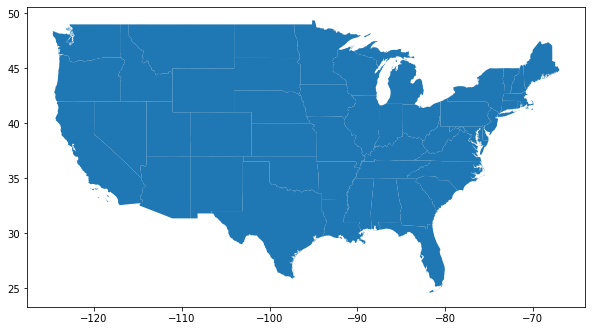

In [5]:
# import matplotlib
import matplotlib.pyplot as plt

# change the default figure size to 10 inches by 10 inches
plt.rcParams['figure.figsize'] = [10, 10]

# plot the shapefile again
us.plot()

### 2.2 Project the geometries

You may feel the Contiguous U.S. is a bit strange, as it is flattened than it is appeared in most U.S. maps.

You can use `.crs` attribute to check the projection of the data

In [6]:
us.crs

<Geographic 2D CRS: EPSG:4269>
Name: NAD83
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: North America - onshore and offshore: Canada - Alberta; British Columbia; Manitoba; New Brunswick; Newfoundland and Labrador; Northwest Territories; Nova Scotia; Nunavut; Ontario; Prince Edward Island; Quebec; Saskatchewan; Yukon. Puerto Rico. United States (USA) - Alabama; Alaska; Arizona; Arkansas; California; Colorado; Connecticut; Delaware; Florida; Georgia; Hawaii; Idaho; Illinois; Indiana; Iowa; Kansas; Kentucky; Louisiana; Maine; Maryland; Massachusetts; Michigan; Minnesota; Mississippi; Missouri; Montana; Nebraska; Nevada; New Hampshire; New Jersey; New Mexico; New York; North Carolina; North Dakota; Ohio; Oklahoma; Oregon; Pennsylvania; Rhode Island; South Carolina; South Dakota; Tennessee; Texas; Utah; Vermont; Virginia; Washington; West Virginia; Wisconsin; Wyoming. US Virgin Islands. British Virgin Islands

The printed information shows that the shapefile is using a geographic coordinate system (latitude and longitude). The `EPSG:4269` is the unique ID of the coordinate system. There is no projection, meaning the geometries showing above are actually projected using latitude and longitude, which is wrong!

We can use the `to_crs` function to project the geometries to the Albers Equal Area Conic projection (EPSG: 5070), which is the most common projection for a U.S. map.

In [7]:
# Project geodataframe to the Albers equal area conic projection, and store the projected geodataframe in us2
us2 = us.to_crs(5070)

# preview us2
us2.head()

,GEOID,NAME,ALAND,AWATER,Abbr,Capital,Population,geometry
0,01,Alabama,131173688951,4593686489,AL,Montgomery,4903185,"MULTIPOLYGON (((760323.731 857474.728, 760524...."
1,04,Arizona,294198560125,1027346486,AZ,Phoenix,7278717,"POLYGON ((-1746851.979 1221914.112, -1746649.6..."
2,05,Arkansas,134771517596,2960191698,AR,Little Rock,3017804,"POLYGON ((122663.982 1495564.993, 122680.313 1..."
3,06,California,403501101370,20466718403,CA,Sacramento,39512223,"MULTIPOLYGON (((-2066923.367 1403703.122, -206..."
4,08,Colorado,268429343790,1175112870,CO,Denver,5758736,"POLYGON ((-1123222.584 1807303.824, -1121310.5..."


You may noticed that the coordinates in the geometry columns have changed to meters, meaning that the geometries are projected to the Albers equal area conic projection, using meter as the unit.

Next, plot the geodataframe. You may have observed the difference compared to the unprojected one. The projected geometries look similar to official U.S. maps.

Other than the Albers projection, you can project the geodataframe to any projection using the EPSG code.

<AxesSubplot:>

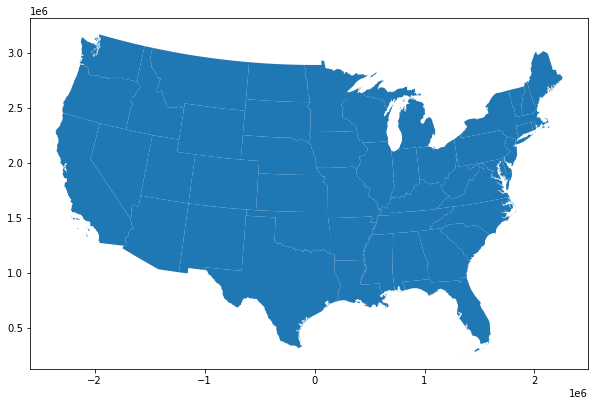

In [8]:
us2.plot()

### 2.3 Creating choropleth maps

You can easily create a choropleth map using values in the 'Population' column. The argument `cmap` defines the color scheme (Orange to Red). You can find more colors from [here](https://matplotlib.org/stable/tutorials/colors/colormaps.html)

<AxesSubplot:>

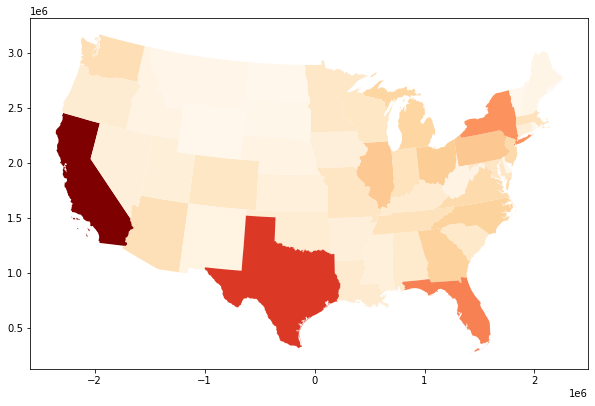

In [9]:
# Create a choropleth map of state population 

us2.plot(column ='Population',cmap='OrRd')

Larger states naturally have more people (larger population). That's why California, Texas and Florida stand out in the above map. But you may not feel lots of people when you actually live there, especially in some areas in Texas.

Instead, population density indicates how "crowded" a state is. The population density of a state is the ratio of population ("Population") to land area of the state ("ALAND"). 

### Quiz 1: Please calculate population density of the states and store it in a new column "Pop_density".

In [10]:
# Population density = Population/ALAND
us2["Pop_density"] = us2['Population']/us2["ALAND"]

# Preview the first five rows of us2
us2.head()

,GEOID,NAME,ALAND,AWATER,Abbr,Capital,Population,geometry,Pop_density
0,01,Alabama,131173688951,4593686489,AL,Montgomery,4903185,"MULTIPOLYGON (((760323.731 857474.728, 760524....",0.000037
1,04,Arizona,294198560125,1027346486,AZ,Phoenix,7278717,"POLYGON ((-1746851.979 1221914.112, -1746649.6...",0.000025
2,05,Arkansas,134771517596,2960191698,AR,Little Rock,3017804,"POLYGON ((122663.982 1495564.993, 122680.313 1...",0.000022
3,06,California,403501101370,20466718403,CA,Sacramento,39512223,"MULTIPOLYGON (((-2066923.367 1403703.122, -206...",0.000098
4,08,Colorado,268429343790,1175112870,CO,Denver,5758736,"POLYGON ((-1123222.584 1807303.824, -1121310.5...",0.000021


### Quiz 2: Please create a choropleth map to show population density in the states.

Please refer to [this website](https://geopandas.org/en/stable/docs/user_guide/mapping.html) to learn more about the plot function. 

You may need to use "fisher_jenks" as the scheme to show more color gradient in the map.

<AxesSubplot:>

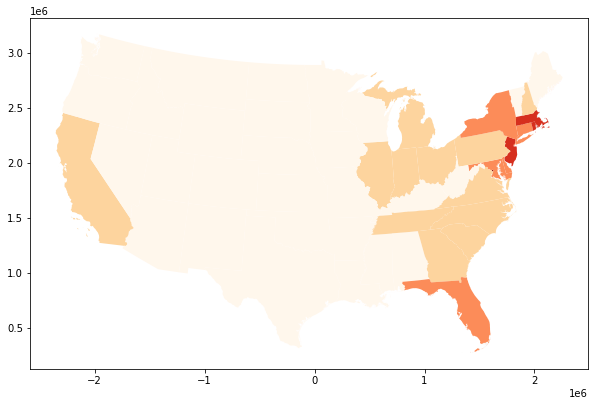

In [11]:
# Create a choropleth map of population density in states
us2.plot(column ='Pop_density',cmap='OrRd', scheme='fisher_jenks')

### 2.4 Query in GeoDataFrame

A GeoDataFrame is an extension of a dataframe with geometries, meaning that you can use functions in pandas to manipulate GeoDataFrame. For example, you can do queries in a GeoDataFrame as you do it in a DataFrame.

First, let's select Florida from the GeoDataFrame "us2" and show it in a plot.

<AxesSubplot:>

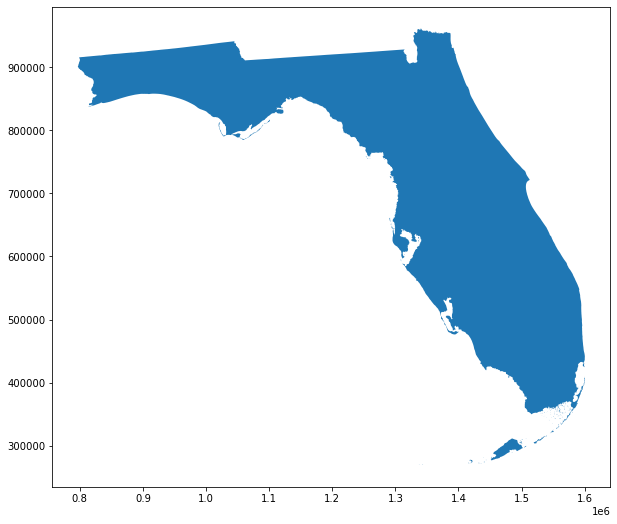

In [12]:
# Select the State of Florida and store it in fl
fl = us2[us2['NAME']=='Florida']

# Plot "fl"
fl.plot()

The boundary of Florida is a bit tilted to the left. This is because the Albers Equal Area Conic projection is suitable for mapping the entire U.S., but is not suitable for local areas.

### Quiz 3: Please project "fl" to the UTM 17N projection (EPSG: 32617), which is a projection that better fits Florida. Then plot the reprojected "fl".

<AxesSubplot:>

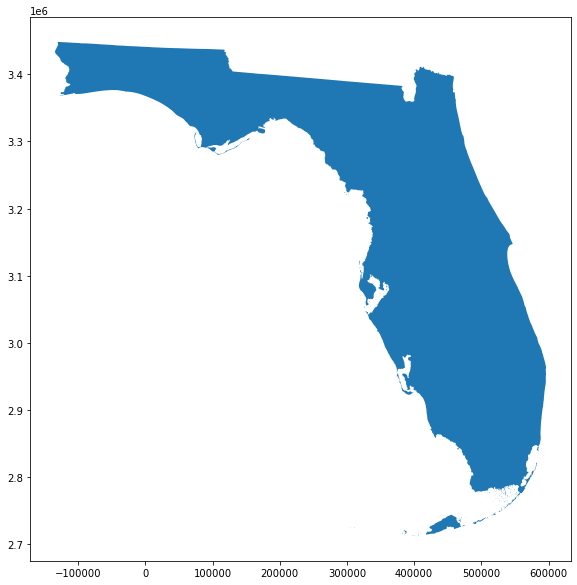

In [13]:
# Repreject fl to EPSG:32617
fl = fl.to_crs(32617)

# Plot fl again
fl.plot()

### Quiz 4: Please select states where population density is greater than Florida and plot the selected states in a map.

<AxesSubplot:>

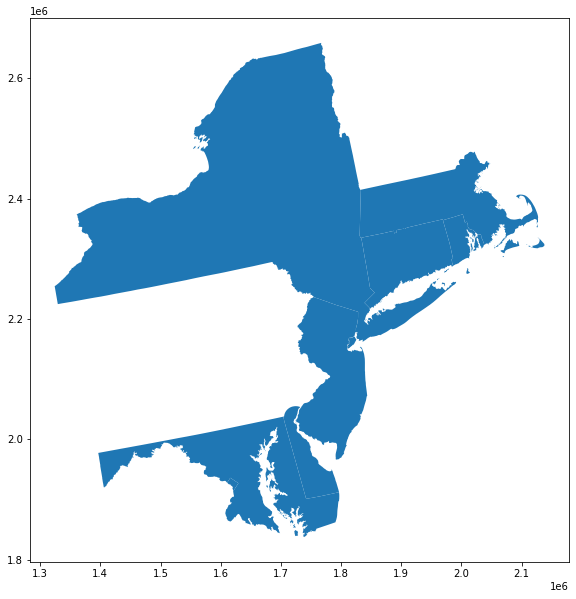

In [14]:
# get population density of Florida
fl_den = fl['Pop_density'].iloc[0]

# plot states where population density is larger than Florida
Hi_pop_states = us2[us2['Pop_density'] > fl_den]

# Plot selected states 
Hi_pop_states.plot()

## 3. Raster Data

### 3.1 Read a raster

Raster data is a georeferenced 2D array. The Rasterio library provides a suite of functions to read and manipulate raster data. Next, you will use Rasterio to read and analyze a Digital Elevation Model (DEM) of Hillsborough County. The DEM is a raster where pixel values are elevation (meter) above the sea level.

In [15]:
# import rasterio and rasterio.plot
import rasterio as rio
import rasterio.plot as rio_pl

# import numpy
import numpy as np

Read the raster file.

In [16]:
# read the raster data in the other folder
dem = rio.open("other/hill_dem.tif")

Plot the raster in a map

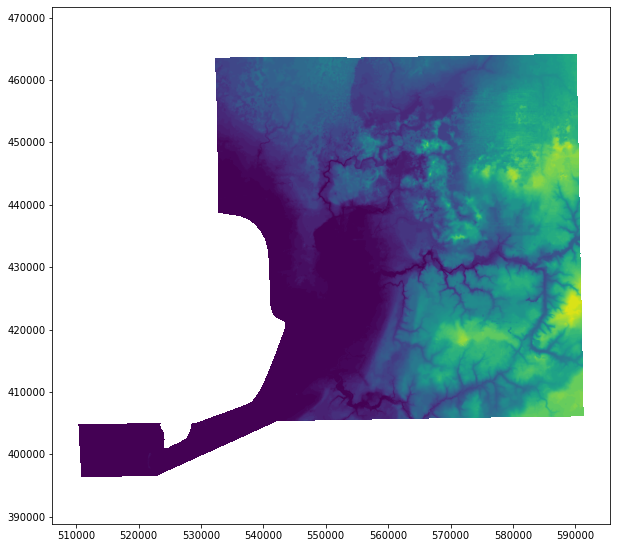

<AxesSubplot:>

In [17]:
rio_pl.show(dem)

Print the metadata of the raster.

In [18]:
dem.profile

{'driver': 'GTiff', 'dtype': 'int16', 'nodata': 128.0, 'width': 2981, 'height': 2760, 'count': 1, 'crs': CRS.from_epsg(3087), 'transform': Affine(30.0, 0.0, 506203.09843799996,
       0.0, -30.0, 471681.421635), 'blockxsize': 128, 'blockysize': 128, 'tiled': True, 'interleave': 'band'}

The printed profile includes the following information:
- driver: format of the raster file
- dtype: data type of the raster
- nodata: coding of no-data pixels
- width: number of pixels in width
- height: number of pixels in height
- count: number of band
- crs: projection
- transform: Affine(pixel_width, rotation, top_left_x, rotation, -pixel_height, top_left_y)
- blockxsize, blockysize & tiled: information about interal tiling
- interleave: methods for encoding image

As a raster is essentially a georeferenced 2D array, we can get a numpy array from the raster data.

In [19]:
# Read Band 1 (the only band) of the raster
array = dem.read(1)

# Print the type of the array
print(type(array))

# print the shape of the array
print(array.shape)

<class 'numpy.ndarray'>
(2760, 2981)


### 3.2 Print the statistics of the raster

Print maximum, minimum and mean elevation of the DEM

In [20]:
print("Maximum elevation: "+ str(array.max()))
print("Minimum elevation: "+ str(array.min()))
print("Mean elevation: "+ str(array.mean()))

Maximum elevation: 128
Minimum elevation: 0
Mean elevation: 76.73832922518949


Do you think the statistics printed above make sense? Is there really a place in Hillsborough County is 128m (420 feet) high?

As shown in the profile, no-data pixels in the raster are coded as 128. So the maximum values are actually the no-data pixels. To perform numerical analysis correctly, we need to mask out the pixels with a value 128. We will convert all no-data pixels to `numpy.ma.masked`

In [21]:
array[array==128] = np.ma.masked

Print maximum, minimum and mean elevation of the DEM again

In [22]:
print("Maximum elevation: "+ str(array.max()))
print("Minimum elevation: "+ str(array.min()))
print("Mean elevation: "+ str(array.mean()))

Maximum elevation: 52
Minimum elevation: 0
Mean elevation: 6.630980752495272


### 3.3 Analyze the raster

Next, we create a map to show only areas where the elevation is equal to or greater than 30m (100 feet). To do so, you need to mask the pixels where elevation is smaller than 30m.

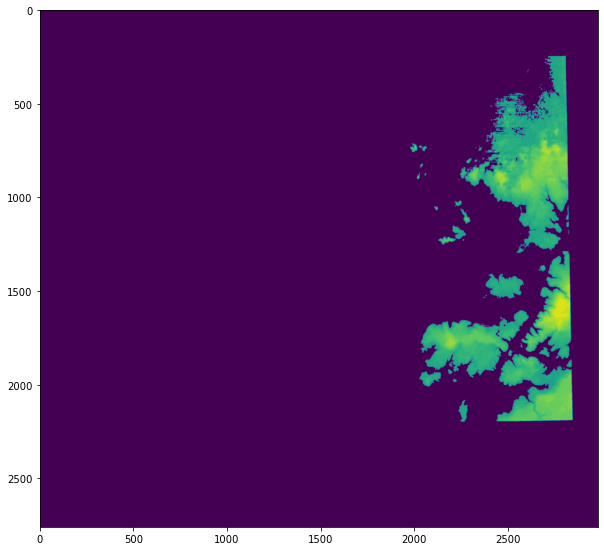

<AxesSubplot:>

In [23]:
# Mask pixels where elevation is <30
array[array<30] = np.ma.masked

# Display the unmasked pixels (elevation >= 30)
rio_pl.show(array)

Low-lying coastal areas are at a high-risk of flooding and storm surge. Next, we will select areas where elevation is equal to or less than 1 meter and plot the areas in a map.

### Quiz 5 (2pt): Please complete the following code to display areas where elevation is equal to or less than 1 meter.

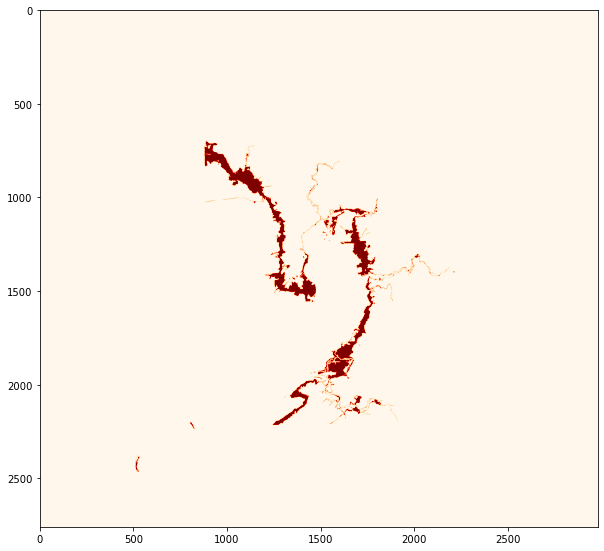

<AxesSubplot:>

In [24]:
# Read the numpy array from Band 1 of the DEM
array = dem.read(1)

# Mask pixels where elevation is greater than 1
array[array>1] = np.ma.masked

# Displayed the unmasked pixels
rio_pl.show(array,cmap='OrRd')